In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load data

In [41]:
system = "KOI-0168"    #KOI-0156, KOI-0168, KOI-2086

data = pd.read_csv("systems/%s_data.csv"%system)
results = pd.read_csv("systems/%s_results.csv"%system)
data.columns

Index([u'Unnamed: 0', u'm1', u'T1', u'P1', u'h1', u'k1', u'm2', u'T2', u'P2',
       u'h2', u'k2', u'm3', u'T3', u'P3', u'h3', u'k3'],
      dtype='object')

Plot data

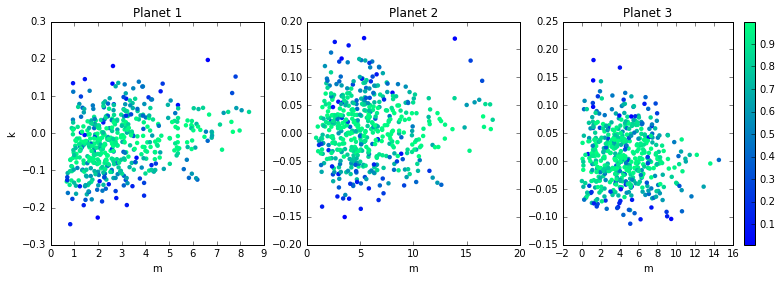

In [48]:
x = "m"
y = "k"
proba = results["predict_proba"].values

colorbar = 'winter'
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=[13, 4])
ax1.scatter(data["%s1"%x][:len(proba)], data["%s1"%y][:len(proba)], c=proba, cmap=colorbar, lw=0)
ax2.scatter(data["%s2"%x][:len(proba)], data["%s2"%y][:len(proba)], c=proba, cmap=colorbar, lw=0)
c=ax3.scatter(data["%s3"%x][:len(proba)], data["%s3"%y][:len(proba)], c=proba, cmap=colorbar, lw=0)

ax1.set_ylabel(y) 
ax1.set_xlabel(x)
ax2.set_xlabel(x)
ax3.set_xlabel(x)
ax1.set_title("Planet 1")
ax2.set_title("Planet 2")
ax3.set_title("Planet 3")
cb = f.colorbar(c)
plt.savefig("images/%s_%s%s.png"%(system,x,y))

In [4]:
#%%time
#fullfeatures = generate_features(d, Ms[system])

Load the trained model

In [5]:
import pickle 
model = pickle.load(open('OptimalXGBmodel.pkl', 'rb'))

/Users/silburt/anaconda2/envs/ml/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/silburt/anaconda2/envs/ml/lib/python2.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.18.1 when using version 0.18. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


The trained model only uses a subset of the generated features, so make a list of the ones it needs for evaluation

In [6]:
features = []
features += ['avg_iH1', 'avg_iH2']
features += ['norm_std_a1', 'norm_max_a1', 'norm_std_window10_a1', 'norm_max_window10_a1']
features += ['norm_std_a2', 'norm_max_a2', 'norm_std_window10_a2', 'norm_max_window10_a2']
features += ['norm_std_a3', 'norm_max_a3', 'norm_std_window10_a3', 'norm_max_window10_a3']
features += ['avg_ecross1', 'std_ecross1', 'max_ecross1', 'min_ecross1']
features += ['avg_ecross2', 'std_ecross2', 'max_ecross2', 'min_ecross2']
features += ['avg_ecross3', 'std_ecross3', 'max_ecross3', 'min_ecross3']
features += ['norm_a1_slope', 'norm_a2_slope', 'norm_a3_slope']
features += ['Lyapunov_time']

There's probably a better way to do this, but it seems the XGBoost API wants a dataframe passed to its predict method. So we need to turn our features into a dataframe with a single row. 

In [19]:
results = pd.DataFrame(columns=features)
for i in range(len(fullfeatures)):
    results.loc[i] = fullfeatures[i][features] # take only the features the model uses
results

,avg_iH1,avg_iH2,norm_std_a1,norm_max_a1,norm_std_window10_a1,norm_max_window10_a1,norm_std_a2,norm_max_a2,norm_std_window10_a2,norm_max_window10_a2,...,max_ecross2,min_ecross2,avg_ecross3,std_ecross3,max_ecross3,min_ecross3,norm_a1_slope,norm_a2_slope,norm_a3_slope,Lyapunov_time
0,0.0,0.0,0.000100,0.000410,0.000160,0.000420,0.000062,0.000213,0.000105,0.000206,...,0.147322,0.098001,0.0,0.0,0.228211,0.083710,1.549142e-11,-6.852515e-12,2.226085e-12,30500.568888
1,0.0,0.0,0.000069,0.000175,0.000069,0.000145,0.000104,0.000250,0.000116,0.000224,...,0.189296,0.127606,0.0,0.0,0.177089,0.083979,8.603166e-12,-8.422717e-12,-2.952698e-12,20859.027703
2,0.0,0.0,0.000078,0.000221,0.000095,0.000205,0.000087,0.000190,0.000098,0.000211,...,0.383287,0.325424,0.0,0.0,0.634504,0.515058,4.852462e-12,-1.479538e-11,3.694677e-11,122097.459227
3,0.0,0.0,0.000116,0.000260,0.000106,0.000199,0.000102,0.000227,0.000089,0.000167,...,0.571892,0.486497,0.0,0.0,0.592345,0.538870,1.067643e-11,-1.143541e-11,9.333069e-13,70088.857813
4,0.0,0.0,0.000106,0.000287,0.000149,0.000229,0.000095,0.000362,0.000083,0.000156,...,0.275512,0.189886,0.0,0.0,0.391527,0.314597,8.675848e-12,-6.374275e-12,3.252668e-12,37936.669508
5,0.0,0.0,0.000094,0.000208,0.000122,0.000208,0.000081,0.000262,0.000085,0.000167,...,0.187163,0.032003,0.0,0.0,0.280324,0.217524,8.613365e-12,8.449954e-12,-1.609590e-11,25363.048308
6,0.0,0.0,0.000134,0.000288,0.000171,0.000295,0.000075,0.000182,0.000078,0.000122,...,0.157969,0.088416,0.0,0.0,0.270049,0.167921,1.378793e-11,-6.679603e-12,-2.326724e-12,56727.763838
7,0.0,0.0,0.000114,0.000296,0.000107,0.000209,0.000121,0.000407,0.000088,0.000207,...,0.380896,0.309821,0.0,0.0,0.455249,0.373411,7.172475e-12,-1.586707e-11,1.452680e-11,354597.602255
8,0.0,0.0,0.000106,0.000296,0.000137,0.000262,0.000086,0.000232,0.000097,0.000162,...,0.342549,0.240861,0.0,0.0,0.294896,0.255239,1.844975e-11,1.428360e-11,-1.930206e-11,102592.827202
9,0.0,0.0,0.000134,0.000441,0.000137,0.000279,0.000082,0.000260,0.000086,0.000177,...,0.379323,0.312785,0.0,0.0,0.326120,0.204379,1.955214e-11,-1.089163e-11,-2.625520e-13,73395.459618


Predict probability

In [21]:
results["predict_proba"] = model.predict_proba(results)[:,1]
results

,avg_iH1,avg_iH2,norm_std_a1,norm_max_a1,norm_std_window10_a1,norm_max_window10_a1,norm_std_a2,norm_max_a2,norm_std_window10_a2,norm_max_window10_a2,...,min_ecross2,avg_ecross3,std_ecross3,max_ecross3,min_ecross3,norm_a1_slope,norm_a2_slope,norm_a3_slope,Lyapunov_time,predict_proba
0,0.0,0.0,0.000100,0.000410,0.000160,0.000420,0.000062,0.000213,0.000105,0.000206,...,0.098001,0.0,0.0,0.228211,0.083710,1.549142e-11,-6.852515e-12,2.226085e-12,30500.568888,0.995432
1,0.0,0.0,0.000069,0.000175,0.000069,0.000145,0.000104,0.000250,0.000116,0.000224,...,0.127606,0.0,0.0,0.177089,0.083979,8.603166e-12,-8.422717e-12,-2.952698e-12,20859.027703,0.979242
2,0.0,0.0,0.000078,0.000221,0.000095,0.000205,0.000087,0.000190,0.000098,0.000211,...,0.325424,0.0,0.0,0.634504,0.515058,4.852462e-12,-1.479538e-11,3.694677e-11,122097.459227,0.459502
3,0.0,0.0,0.000116,0.000260,0.000106,0.000199,0.000102,0.000227,0.000089,0.000167,...,0.486497,0.0,0.0,0.592345,0.538870,1.067643e-11,-1.143541e-11,9.333069e-13,70088.857813,0.175521
4,0.0,0.0,0.000106,0.000287,0.000149,0.000229,0.000095,0.000362,0.000083,0.000156,...,0.189886,0.0,0.0,0.391527,0.314597,8.675848e-12,-6.374275e-12,3.252668e-12,37936.669508,0.930810
5,0.0,0.0,0.000094,0.000208,0.000122,0.000208,0.000081,0.000262,0.000085,0.000167,...,0.032003,0.0,0.0,0.280324,0.217524,8.613365e-12,8.449954e-12,-1.609590e-11,25363.048308,0.981982
6,0.0,0.0,0.000134,0.000288,0.000171,0.000295,0.000075,0.000182,0.000078,0.000122,...,0.088416,0.0,0.0,0.270049,0.167921,1.378793e-11,-6.679603e-12,-2.326724e-12,56727.763838,0.991716
7,0.0,0.0,0.000114,0.000296,0.000107,0.000209,0.000121,0.000407,0.000088,0.000207,...,0.309821,0.0,0.0,0.455249,0.373411,7.172475e-12,-1.586707e-11,1.452680e-11,354597.602255,0.463761
8,0.0,0.0,0.000106,0.000296,0.000137,0.000262,0.000086,0.000232,0.000097,0.000162,...,0.240861,0.0,0.0,0.294896,0.255239,1.844975e-11,1.428360e-11,-1.930206e-11,102592.827202,0.805423
9,0.0,0.0,0.000134,0.000441,0.000137,0.000279,0.000082,0.000260,0.000086,0.000177,...,0.312785,0.0,0.0,0.326120,0.204379,1.955214e-11,-1.089163e-11,-2.625520e-13,73395.459618,0.833715


In [26]:
data.to_csv("systems/%s_data.csv"%system)
results.to_csv("systems/%s_results.csv"%system)